In [1]:
# Load packages
from sklearn.manifold import TSNE, SpectralEmbedding
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from gensim.models import Word2Vec
from scipy.spatial import distance
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
plt.rcParams['font.family'] = 'Arial'

import pandas as pd
import numpy as np
import scipy as sp
import pickle
import umap

# Load vocabulary
with open("../data/vocab_mimic.pickle", "rb") as fr:
    vocab = pickle.load(fr)

# Load model
model = Word2Vec.load("../model/autophe_word2vec_shuffled_abnormal.model")

# Create dictionary with label classes
class_labels = {'Demographics':np.arange(14),
                'Location':np.arange(14,50),
                'Diagnosis':np.arange(50, 19785),
                'Procedure':np.arange(19785, 31288),
                'Lab':np.arange(31288, 32217),
                'Medication':np.arange(32217, 36987)}

# Assign a class to each label in the vocabulary
label_class = np.concatenate((
               np.repeat('Demographics', len(class_labels['Demographics'])),
               np.repeat('Location',     len(class_labels['Location'])),
               np.repeat('Diagnosis',    len(class_labels['Diagnosis'])),
               np.repeat('Procedure',    len(class_labels['Procedure'])),
               np.repeat('Lab',          len(class_labels['Lab'])),
               np.repeat('Medication',   len(class_labels['Medication']))),
    axis=0)

# Create vocabulary list with format [label, category, description]
vocab_list = np.array([[key, label_class[i], vocab[key]] for i,key in enumerate(vocab.keys())])

# Create map vocab map
model_label_list = []
for key in model.wv.key_to_index:
    key_label = key.split(':OK')[0].split(':AB')[0]
    model_label_list.append([key, vocab_list[np.argwhere(vocab_list[:,0]==key_label).flatten(),1][0], model.wv.key_to_index[key]])
model_label_list = np.array(model_label_list, dtype=object)

# Select diagnosis vectors
diagnosis_vectors = model.wv.vectors[model_label_list[np.argwhere(model_label_list[:,1] == 'Diagnosis').flatten(), 2].astype(np.int32)]

# Diagnosis embedding clustering (t-SNE)
diagnosis_reduced = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(diagnosis_vectors)

# Diagnosis embedding clustering (UMAP)
diagnosis_reduced_UMAP = umap.UMAP().fit_transform(diagnosis_vectors)

# Diagnosis embedding clustering (PCA)
random_state = 0
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))
diagnosis_reduced_PCA = pca.fit_transform(diagnosis_vectors)

# Diagnosis embedding clustering (SVD)
random_state = 0
svd = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2, random_state=random_state))
diagnosis_reduced_SVD = svd.fit_transform(diagnosis_vectors)

print('Complete')

Complete


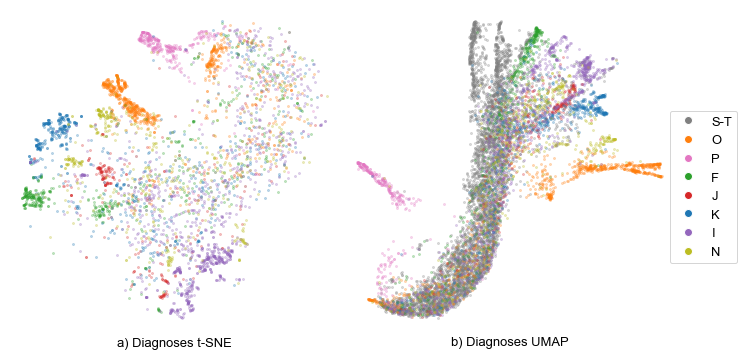

In [6]:
# Check orientation
#diagnosis_reduced[:,0] = -1*diagnosis_reduced[:,0]
#diagnosis_reduced[:,1] = -1*diagnosis_reduced[:,1]
#diagnosis_reduced_UMAP[:,1] = -1*diagnosis_reduced_UMAP[:,1]

diag_list = model_label_list[np.argwhere(model_label_list[:,1] == 'Diagnosis').flatten()]

idx_letter = np.argwhere(diag_list[:,0].astype('U1') == 'O').flatten()
idx_letter2 = np.argwhere(diag_list[:,0].astype('U1') == 'P').flatten()
idx_letter3 = np.argwhere(diag_list[:,0].astype('U1') == 'F').flatten()
idx_letter4 = np.argwhere(diag_list[:,0].astype('U1') == 'J').flatten()
idx_letter5 = np.argwhere(diag_list[:,0].astype('U1') == 'K').flatten()
idx_letter6 = np.argwhere((diag_list[:,0].astype('U1') == 'S') | (diag_list[:,0].astype('U1') == 'T')).flatten() # I, N, Q
idx_letter7 = np.argwhere(diag_list[:,0].astype('U1') == 'I').flatten()
idx_letter8 = np.argwhere(diag_list[:,0].astype('U1') == 'N').flatten()
idx_letter9 = np.argwhere(diag_list[:,0].astype('U1') == 'Q').flatten()

fig = plt.figure(figsize=(12,6))

gs = gridspec.GridSpec(1, 2, figure=fig, hspace=0, wspace=0)

ax = plt.subplot(gs[0,0])
#p1 = plt.scatter(diagnosis_reduced[idx_letter6,0],
#            diagnosis_reduced[idx_letter6,1], color='grey', s=4, alpha=.25, rasterized=True, label='S-T')
p2 = plt.scatter(diagnosis_reduced[idx_letter,0],
            diagnosis_reduced[idx_letter,1], color='C1', s=4, alpha=.25, rasterized=True, label='O')
p3 = plt.scatter(diagnosis_reduced[idx_letter2,0],
            diagnosis_reduced[idx_letter2,1], color='C6', s=4, alpha=.25, rasterized=True, label='P')
p4 = plt.scatter(diagnosis_reduced[idx_letter3,0],
            diagnosis_reduced[idx_letter3,1], color='C2', s=4, alpha=.25, rasterized=True, label='F')
p5 = plt.scatter(diagnosis_reduced[idx_letter4,0],
            diagnosis_reduced[idx_letter4,1], color='C3', s=4, alpha=.25, rasterized=True, label='J')
p6 = plt.scatter(diagnosis_reduced[idx_letter5,0],
            diagnosis_reduced[idx_letter5,1], color='C0', s=4, alpha=.25, rasterized=True, label='K')
p7 = plt.scatter(diagnosis_reduced[idx_letter7,0],
            diagnosis_reduced[idx_letter7,1], color='C4', s=4, alpha=.25, rasterized=True, label='I')
p8 = plt.scatter(diagnosis_reduced[idx_letter8,0],
            diagnosis_reduced[idx_letter8,1], color='C8', s=4, alpha=.25, rasterized=True, label='N')

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('a) Diagnoses t-SNE', fontsize=13, family='Arial')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='S-T',  markerfacecolor='grey', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='O',  markerfacecolor='C1', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='P',  markerfacecolor='C6', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='F',  markerfacecolor='C2', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='J',  markerfacecolor='C3', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='K',  markerfacecolor='C0', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='I',  markerfacecolor='C4', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='N',  markerfacecolor='C8', markersize=8),
                  ]


ax2 = plt.subplot(gs[0,1])
#ax2.text(-6, 12.5, 'ICD-10 CM clusters', fontsize=1#4)
#ax2.text(-12, 5.5, 'Sorted dataset - ICD-10 CM clusters', fontsize=14)

p1 = plt.scatter(diagnosis_reduced_UMAP[idx_letter6,0], diagnosis_reduced_UMAP[idx_letter6,1], s=4, color='grey', alpha=.25, rasterized=True)
p2 = plt.scatter(diagnosis_reduced_UMAP[idx_letter,0], diagnosis_reduced_UMAP[idx_letter,1], s=4, color='C1', alpha=.25, rasterized=True)
p3 = plt.scatter(diagnosis_reduced_UMAP[idx_letter2,0], diagnosis_reduced_UMAP[idx_letter2,1], s=4, color='C6', alpha=.25, rasterized=True)
p4 = plt.scatter(diagnosis_reduced_UMAP[idx_letter3,0], diagnosis_reduced_UMAP[idx_letter3,1], s=4, color='C2', alpha=.25, rasterized=True)
p5 = plt.scatter(diagnosis_reduced_UMAP[idx_letter4,0], diagnosis_reduced_UMAP[idx_letter4,1], s=4, color='C3', alpha=.25, rasterized=True)
p6 = plt.scatter(diagnosis_reduced_UMAP[idx_letter5,0], diagnosis_reduced_UMAP[idx_letter5,1], s=4, color='C0', alpha=.25, rasterized=True)
p7 = plt.scatter(diagnosis_reduced_UMAP[idx_letter7,0], diagnosis_reduced_UMAP[idx_letter7,1], s=4, color='C4', alpha=.25, rasterized=True)
p8 = plt.scatter(diagnosis_reduced_UMAP[idx_letter8,0], diagnosis_reduced_UMAP[idx_letter8,1], s=4, color='C8', alpha=.25, rasterized=True)
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xlabel('b) Diagnoses UMAP', fontsize=13)
ax2.legend(handles=legend_elements, ncol=1, fontsize=13, bbox_to_anchor=(.7, .2, 0.5, 0.5))

#plt.savefig('../figs/fig_clusters/diagnosis_clustering_shuffled.pdf', dpi=300, bbox_inches='tight')
plt.show()

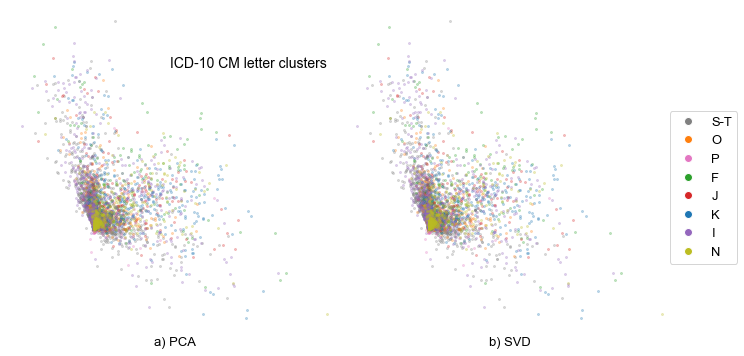

In [17]:
fig = plt.figure(figsize=(12,6))

gs = gridspec.GridSpec(1, 2, figure=fig, hspace=0, wspace=0)

ax3 = plt.subplot(gs[0,0])

p1 = plt.scatter(diagnosis_reduced_PCA[idx_letter6,0], diagnosis_reduced_PCA[idx_letter6,1], s=4, color='grey', alpha=.25, rasterized=True)
p2 = plt.scatter(diagnosis_reduced_PCA[idx_letter,0], diagnosis_reduced_PCA[idx_letter,1], s=4, color='C1', alpha=.25, rasterized=True)
p3 = plt.scatter(diagnosis_reduced_PCA[idx_letter2,0], diagnosis_reduced_PCA[idx_letter2,1], s=4, color='C6', alpha=.25, rasterized=True)
p4 = plt.scatter(diagnosis_reduced_PCA[idx_letter3,0], diagnosis_reduced_PCA[idx_letter3,1], s=4, color='C2', alpha=.25, rasterized=True)
p5 = plt.scatter(diagnosis_reduced_PCA[idx_letter4,0], diagnosis_reduced_PCA[idx_letter4,1], s=4, color='C3', alpha=.25, rasterized=True)
p6 = plt.scatter(diagnosis_reduced_PCA[idx_letter5,0], diagnosis_reduced_PCA[idx_letter5,1], s=4, color='C0', alpha=.25, rasterized=True)
p7 = plt.scatter(diagnosis_reduced_PCA[idx_letter7,0], diagnosis_reduced_PCA[idx_letter7,1], s=4, color='C4', alpha=.25, rasterized=True)
p8 = plt.scatter(diagnosis_reduced_PCA[idx_letter8,0], diagnosis_reduced_PCA[idx_letter8,1], s=4, color='C8', alpha=.25, rasterized=True)
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.set_xlabel('a) PCA', fontsize=13)


legend_elements = [Line2D([0], [0], marker='o', color='w', label='S-T',  markerfacecolor='grey', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='O',  markerfacecolor='C1', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='P',  markerfacecolor='C6', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='F',  markerfacecolor='C2', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='J',  markerfacecolor='C3', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='K',  markerfacecolor='C0', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='I',  markerfacecolor='C4', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='N',  markerfacecolor='C8', markersize=8),
                  ]

ax4 = plt.subplot(gs[0,1])

ax4.text(-50, 25, 'ICD-10 CM letter clusters', fontsize=14)

p1 = plt.scatter(diagnosis_reduced_SVD[idx_letter6,0], diagnosis_reduced_SVD[idx_letter6,1], s=4, color='grey', alpha=.25, rasterized=True)
p2 = plt.scatter(diagnosis_reduced_SVD[idx_letter,0], diagnosis_reduced_SVD[idx_letter,1], s=4, color='C1', alpha=.25, rasterized=True)
p3 = plt.scatter(diagnosis_reduced_SVD[idx_letter2,0], diagnosis_reduced_SVD[idx_letter2,1], s=4, color='C6', alpha=.25, rasterized=True)
p4 = plt.scatter(diagnosis_reduced_SVD[idx_letter3,0], diagnosis_reduced_SVD[idx_letter3,1], s=4, color='C2', alpha=.25, rasterized=True)
p5 = plt.scatter(diagnosis_reduced_SVD[idx_letter4,0], diagnosis_reduced_SVD[idx_letter4,1], s=4, color='C3', alpha=.25, rasterized=True)
p6 = plt.scatter(diagnosis_reduced_SVD[idx_letter5,0], diagnosis_reduced_SVD[idx_letter5,1], s=4, color='C0', alpha=.25, rasterized=True)
p7 = plt.scatter(diagnosis_reduced_SVD[idx_letter7,0], diagnosis_reduced_SVD[idx_letter7,1], s=4, color='C4', alpha=.25, rasterized=True)
p8 = plt.scatter(diagnosis_reduced_SVD[idx_letter8,0], diagnosis_reduced_SVD[idx_letter8,1], s=4, color='C8', alpha=.25, rasterized=True)
ax4.get_xaxis().set_ticks([])
ax4.get_yaxis().set_ticks([])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.set_xlabel('b) SVD', fontsize=13)

ax4.legend(handles=legend_elements, ncol=1, fontsize=13, bbox_to_anchor=(.7, .2, 0.5, 0.5))
#plt.savefig('../figs/diagnosis_svd-pca_time.pdf', dpi=300, bbox_inches='tight')
plt.show()